# This project predicts whether there is going to be rise in stocks or not based on the headlines
    -Viswanadh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("stock_headline_Data.csv",encoding='ISO-8859-1')

In [3]:
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
df.drop(['Date'],axis=1,inplace=True)

In [5]:
df.head(5)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [6]:
Y=df['Label']
df=df.drop(['Label'],axis=1)

# Renaming columns

In [7]:
cols=[str(i) for i in range(1,26)]

In [8]:
df.columns=cols

In [9]:
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


# Considering a sample from the dataset

In [155]:
data=df[0:1001]

In [156]:
data.head(5)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [157]:
data.shape

(1001, 25)

# Joining all the headlines and creating feature X

In [158]:
headlines=[]
for row in range(len(data)):
    headlines.append(' '.join(data.iloc[row,1:26]))

In [20]:
len(headlines)

1001

In [22]:
headlines

["Scorecard Hughes' instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Everton's party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupar's debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like it's 1999 Wear wolves have turned into lambs Stump mike catches testy Gough's taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohl's successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Diana's landmine crusade put Tories in a panic Yeltsin's resignation caught opposition flat-footed Russian roulette Sold out Recovering a title",
 "The best lake scene Leader: German sleaze inquiry Cheerio, boyo The main recommendations Has Cubie killed fees? Has Cubie killed fees? Has Cubie

In [25]:
headlines=[s.lower() for s in headlines]

In [26]:
headlines

["scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title",
 "the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie

In [29]:
Y=Y[0:1001]

In [30]:
dataframe=pd.DataFrame({"headlines":headlines,"stocktrend":Y})

# Created a dataframe containing headlines and stock trend.

In [31]:
dataframe

,headlines,stocktrend
0,scorecard hughes' instant hit buoys blues jack...,0
1,the best lake scene leader: german sleaze inqu...,0
2,united's rivals on the road to rio thatcher is...,0
3,thatcher facing ban mcilroy calls for irish fi...,1
4,beckham off but united survive breast cancer s...,1
...,...,...
996,keane criticises united youngsters football: i...,0
997,peter bradshaw on the stage adaptation of when...,0
998,corporations and blogging toot camp hitting th...,0
999,uefa champions league: juve and depor know def...,0


# Using Count and Tfidf Vectors and performing trigram analysis

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
c=CountVectorizer(stop_words='english',ngram_range=(3,3))

In [66]:
X=dataframe['headlines']

In [67]:
X_t=c.fit_transform(X)

In [68]:
len(Y)

1001

In [69]:
X_t

<1001x92591 sparse matrix of type '<class 'numpy.int64'>'
	with 93653 stored elements in Compressed Sparse Row format>

# For 1001 documents(Headlines) our NLP model has 89832 features

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X_t,Y)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr=LogisticRegression()

In [74]:
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
predictions=lr.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print(accuracy_score(y_test,predictions))

0.47410358565737054


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tf=TfidfVectorizer(stop_words='english',ngram_range=(3,3))

In [90]:
X_tf=tf.fit_transform(X)

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X_tf,Y)

In [92]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [93]:
predictions_tf=lr.predict(X_test)

In [88]:
print(accuracy_score(Y_test,predictions_tf))

0.5099601593625498


# Observing the top and bottom weighted words

In [104]:
coef=lr.coef_.tolist()[0]

In [105]:
coef

[0.04128216705834047,
 0.0,
 0.043364912777198665,
 0.044942331008562965,
 -0.04238931257157455,
 0.0,
 0.0,
 -0.03945980600758,
 0.0,
 0.0,
 -0.041181146685847686,
 0.041068821097539086,
 -0.03844415198209979,
 0.038597621693960145,
 0.0417190275527645,
 0.0,
 -0.0403220077891602,
 -0.03918132309495977,
 0.0,
 -0.04253792334524749,
 0.0383787628489221,
 0.04122210475430563,
 0.0,
 0.040448097907706704,
 0.0,
 -0.038263600364176635,
 0.0,
 0.04107267437715539,
 0.0,
 0.040448097907706704,
 0.0,
 -0.0418604465574548,
 0.0,
 0.04194633525806915,
 -0.04361012310380359,
 0.04242659440428095,
 0.04439755534829958,
 -0.03802637814343913,
 -0.038263600364176635,
 -0.04043049840312924,
 -0.04037493559863072,
 0.038968325594865426,
 0.04261813803752253,
 -0.04079772132253636,
 0.04617810395134035,
 0.0,
 -0.04858031297490736,
 -0.04287937870861633,
 0.0,
 -0.03918132309495977,
 0.04466745178772851,
 0.0,
 0.0,
 0.04088902505667725,
 0.041068821097539086,
 0.0,
 -0.04103800316933286,
 0.0,
 0.03

In [114]:
w=tf.get_feature_names()

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
w

['000 094 home',
 '000 assets theatre',
 '000 atl unconvinced',
 '000 barrier banks',
 '000 barrier omar',
 '000 battle bramall',
 '000 bbc jobs',
 '000 blair book',
 '000 bodies recovered',
 '000 bonus woodward',
 '000 brawl blues',
 '000 brazilian seduction',
 '000 breathing space',
 '000 bursary way',
 '000 byers threatens',
 '000 casualties season',
 '000 chelsea search',
 '000 children missing',
 '000 closing privilege',
 '000 comedy otis',
 '000 cool operators',
 '000 debt know',
 '000 dent people',
 '000 did pay',
 '000 euro weakened',
 '000 extra police',
 '000 fees times',
 '000 flee californian',
 '000 gain childcare',
 '000 graham frame',
 '000 guineas 647',
 '000 hidden benefit',
 '000 homeless mozambique',
 '000 homes plan',
 '000 honeymoon graz',
 '000 hsbc staff',
 '000 insulting gesture',
 '000 jobs abn',
 '000 jobs catholic',
 '000 jobs chaotic',
 '000 jobs consignia',
 '000 jobs diageo',
 '000 jobs ericsson',
 '000 jobs ira',
 '000 jobs nus',
 '000 jobs steel',
 '000 

In [117]:
coef_df=pd.DataFrame({'Words_trigram':w,'Coef':coef})

In [118]:
coef_df.head(5)

,Words_trigram,Coef
0,000 094 home,0.041282
1,000 assets theatre,0.000000
2,000 atl unconvinced,0.043365
3,000 barrier banks,0.044942
4,000 barrier omar,-0.042389


In [119]:
coef_df.sort_values(['Coef','Words_trigram'],ascending=False)

,Words_trigram,Coef
25739,edinburgh festival review,0.328333
91491,world cup draw,0.250070
790,2006 world cup,0.182654
26905,england south africa,0.171586
89744,west ham united,0.162126
...,...,...
46018,league man utd,-0.143584
49009,lord hutton statement,-0.147208
20097,cubie killed fees,-0.158355
14546,champions league man,-0.174888


# Getting the top 10 and  least 10 weighted words

In [120]:
coef_df.head(10)

,Words_trigram,Coef
0,000 094 home,0.041282
1,000 assets theatre,0.000000
2,000 atl unconvinced,0.043365
3,000 barrier banks,0.044942
4,000 barrier omar,-0.042389
5,000 battle bramall,0.000000
6,000 bbc jobs,0.000000
7,000 blair book,-0.039460
8,000 bodies recovered,0.000000
9,000 bonus woodward,0.000000


In [121]:
coef_df.tail(10)

,Words_trigram,Coef
92581,zoran djindjic hp,0.043558
92582,zoroastre edinburgh theatre,0.042136
92583,zurich championship quarter,0.040825
92584,zurich georgia keeffe,-0.040585
92585,zurich luton new,0.046095
92586,zurich premiership london,0.043122
92587,zurich premiership looks,-0.040375
92588,zut alors supplier,0.000000
92589,zweig review shadow,0.000000
92590,zygotic mynci like,0.041282


# Automating the stock trend prediction

In [153]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def get_stock_trend_prediction(X,Y,nlp_model,ml_model,coef=1):
    X_transformed=nlp_model.fit_transform(X)
    X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y)
    ml_model.fit(X_train,Y_train)
    predictions=ml_model.predict(X_test)
    print(accuracy_score(predictions,Y_test))
    cm=confusion_matrix(predictions,Y_test)
    sns.heatmap(cm,cmap='coolwarm')
    if(coef==1):
        coef_lists=ml_model.coef_.tolist()[0]
        w=nlp_model.get_feature_names_out()
        coefs_df=pd.DataFrame({'Words':w,'weights':coef_lists})
        coefs_df.sort_values(['weights'])
        print("The top 10 weighted words")
        print(coefs_df.head(10))
        print("The bottom 10:")
        print(coefs_df.tail(10))
    
    

0.46613545816733065
The top 10 weighted words
                  Words   weights
0          000 094 home  0.000000
1    000 assets theatre  0.045783
2   000 atl unconvinced  0.044152
3     000 barrier banks  0.045758
4      000 barrier omar  0.000000
5    000 battle bramall  0.039911
6          000 bbc jobs  0.045479
7        000 blair book -0.038740
8  000 bodies recovered  0.038309
9    000 bonus woodward  0.043659
The bottom 10:
                             Words   weights
92581            zoran djindjic hp  0.000000
92582  zoroastre edinburgh theatre  0.042899
92583  zurich championship quarter  0.041560
92584        zurich georgia keeffe -0.039842
92585             zurich luton new  0.000000
92586    zurich premiership london  0.043743
92587     zurich premiership looks -0.039636
92588           zut alors supplier  0.044408
92589          zweig review shadow  0.000000
92590           zygotic mynci like  0.042032


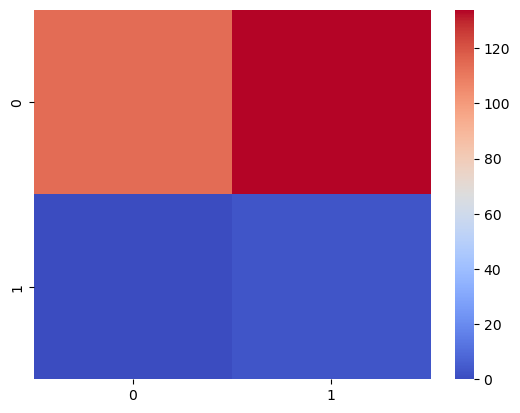

In [154]:
get_stock_trend_prediction(X,Y,tf,lr)